In [1]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
# scikit-learn을 이용한 병합 클러스터링

X = pd.read_csv('modelVec.csv')

x=X.iloc[:, 3:103]
y=X.iloc[:,[1]]
X

,Unnamed: 0,Document,tokenizedDocument,dm1,dm2,dm3,dm4,dm5,dm6,dm7,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,0,Structures (구조),구조,0.007571,0.009271,0.001097,-0.008169,0.008288,-0.004031,0.005913,...,0.007559,0.002194,0.005225,0.006544,0.002247,-0.005967,0.000006,0.008078,-0.005902,0.009378
1,1,❖ 운영체제 서비스 (Operating System Services),운영체제 서비스,-0.005408,-0.000432,0.007262,-0.001670,0.006010,-0.000959,0.000174,...,0.002551,-0.001591,0.004295,-0.007675,0.001010,0.001742,0.006994,0.001577,-0.001139,0.006073
2,2,❖ 운영체제 사용자 인터페이스 (User Operating System Interf...,운영체제 사용자 인터페이스,-0.000675,0.002205,0.002081,-0.001569,0.002325,-0.002679,-0.001739,...,0.002227,0.002521,0.003332,-0.001918,0.000750,0.002942,0.006826,-0.002795,0.001198,-0.003668
3,3,❖ 시스템 콜 (System Calls),시스템 콜,-0.003974,0.001280,-0.001124,0.003658,-0.002917,-0.001571,0.004352,...,0.003336,-0.001584,0.004309,-0.001746,0.007100,-0.001170,-0.001359,-0.001529,0.001247,0.004521
4,4,❖ 시스템 콜 유형 (Types of System Calls),시스템 콜 유형,-0.002334,0.003693,-0.002087,0.003426,-0.000884,-0.003205,0.005925,...,0.005083,-0.002419,0.003281,-0.000775,0.007128,0.000114,-0.001930,-0.002375,-0.001803,0.004846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,427,부트블록(boot block)이 메모리에 로드되고 이것이 디스크에서,부트 블록 이 메모리 로드 것 디스크,0.000134,0.002417,0.002619,-0.002944,0.001233,-0.002974,0.004125,...,0.001648,-0.002370,-0.000503,-0.002053,-0.001085,0.001541,0.000336,-0.003868,0.003449,-0.001514
428,428,부트스트랩 로더를 메모리에 적재한다,부트스트랩 로더 메모리 적재,0.006011,0.005237,0.003949,0.001545,0.000110,-0.004041,-0.000185,...,0.003073,-0.001164,-0.007842,0.001207,0.003099,-0.003354,-0.000956,-0.001892,-0.001931,0.000808
429,429,❖ GRUB(GRand Unified Bootloader) : Linux 시스템을 ...,시스템 위 오픈소스,0.002724,0.004294,-0.001554,0.004204,-0.000373,-0.000777,0.006285,...,0.001152,-0.001788,0.005282,-0.003427,0.003017,0.000926,0.001260,-0.001101,0.000872,-0.002164
430,430,부트스트랩 프로그램,부트스트랩 프로그램,-0.000212,0.009740,0.000037,-0.000122,0.003850,-0.004185,0.005341,...,-0.005131,-0.002866,-0.004601,0.001568,0.006125,-0.004916,0.003836,-0.004747,-0.005337,-0.005394


In [2]:
x

,dm1,dm2,dm3,dm4,dm5,dm6,dm7,dm8,dm9,dm10,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,0.007571,0.009271,0.001097,-0.008169,0.008288,-0.004031,0.005913,0.004799,0.009466,-0.009445,...,0.007559,0.002194,0.005225,0.006544,0.002247,-0.005967,0.000006,0.008078,-0.005902,0.009378
1,-0.005408,-0.000432,0.007262,-0.001670,0.006010,-0.000959,0.000174,0.008251,0.003255,-0.006076,...,0.002551,-0.001591,0.004295,-0.007675,0.001010,0.001742,0.006994,0.001577,-0.001139,0.006073
2,-0.000675,0.002205,0.002081,-0.001569,0.002325,-0.002679,-0.001739,0.005561,-0.005369,-0.003101,...,0.002227,0.002521,0.003332,-0.001918,0.000750,0.002942,0.006826,-0.002795,0.001198,-0.003668
3,-0.003974,0.001280,-0.001124,0.003658,-0.002917,-0.001571,0.004352,0.006807,-0.005046,0.001312,...,0.003336,-0.001584,0.004309,-0.001746,0.007100,-0.001170,-0.001359,-0.001529,0.001247,0.004521
4,-0.002334,0.003693,-0.002087,0.003426,-0.000884,-0.003205,0.005925,0.006315,-0.001758,0.000372,...,0.005083,-0.002419,0.003281,-0.000775,0.007128,0.000114,-0.001930,-0.002375,-0.001803,0.004846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.000134,0.002417,0.002619,-0.002944,0.001233,-0.002974,0.004125,0.001384,-0.001104,-0.001277,...,0.001648,-0.002370,-0.000503,-0.002053,-0.001085,0.001541,0.000336,-0.003868,0.003449,-0.001514
428,0.006011,0.005237,0.003949,0.001545,0.000110,-0.004041,-0.000185,0.004893,-0.002584,0.000047,...,0.003073,-0.001164,-0.007842,0.001207,0.003099,-0.003354,-0.000956,-0.001892,-0.001931,0.000808
429,0.002724,0.004294,-0.001554,0.004204,-0.000373,-0.000777,0.006285,0.000596,-0.001419,-0.001582,...,0.001152,-0.001788,0.005282,-0.003427,0.003017,0.000926,0.001260,-0.001101,0.000872,-0.002164
430,-0.000212,0.009740,0.000037,-0.000122,0.003850,-0.004185,0.005341,0.006127,0.003033,-0.001291,...,-0.005131,-0.002866,-0.004601,0.001568,0.006125,-0.004916,0.003836,-0.004747,-0.005337,-0.005394


In [3]:
y

,Document
0,Structures (구조)
1,❖ 운영체제 서비스 (Operating System Services)
2,❖ 운영체제 사용자 인터페이스 (User Operating System Interf...
3,❖ 시스템 콜 (System Calls)
4,❖ 시스템 콜 유형 (Types of System Calls)
...,...
427,부트블록(boot block)이 메모리에 로드되고 이것이 디스크에서
428,부트스트랩 로더를 메모리에 적재한다
429,❖ GRUB(GRand Unified Bootloader) : Linux 시스템을 ...
430,부트스트랩 프로그램


In [4]:
agg = AgglomerativeClustering(n_clusters=5,linkage="ward")
agg = agg.fit(x)
re=agg.labels_
re

array([4, 0, 1, 3, 3, 3, 1, 4, 1, 3, 3, 1, 3, 1, 1, 0, 3, 3, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 3, 3, 3,
       3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 0, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [5]:
y['re'] = re

C:\Users\82105\AppData\Local\Temp\ipykernel_7484\1159153884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['re'] = re


In [6]:
y

,Document,re
0,Structures (구조),4
1,❖ 운영체제 서비스 (Operating System Services),0
2,❖ 운영체제 사용자 인터페이스 (User Operating System Interf...,1
3,❖ 시스템 콜 (System Calls),3
4,❖ 시스템 콜 유형 (Types of System Calls),3
...,...,...
427,부트블록(boot block)이 메모리에 로드되고 이것이 디스크에서,1
428,부트스트랩 로더를 메모리에 적재한다,1
429,❖ GRUB(GRand Unified Bootloader) : Linux 시스템을 ...,3
430,부트스트랩 프로그램,3


In [7]:
y[y['re']==0]

,Document,re
1,❖ 운영체제 서비스 (Operating System Services),0
15,운영체제 서비스 : View,0
18,운영체제 서비스 (Operating System Services) 1,0
25,운영체제 서비스 (Operating System Services) 2,0
31,운영체제 서비스 (Operating System Services) 3,0
41,l 통신,0
46,운영체제 서비스 (Operating System Services) 4,0
55,운영체제 서비스 (Operating System Services) 5,0
65,운영체제 서비스 (Operating System Services) 6,0
194,❖ 통신(Communications),0


In [8]:
y[y['re']==1]

,Document,re
2,❖ 운영체제 사용자 인터페이스 (User Operating System Interf...,1
6,❖ 운영체제 설계 및 구현 (Operating System Design and Im...,1
8,❖ 운영체제 디버깅 (Operating System Debugging),1
11,목표 (Objectives),1
13,❖ 운영체제를 구성하는 다양한 방법에 대해 논의,1
...,...,...
424,loader라 불리는 작은 코드가 커널을 찾아서 메모리에 적재하고 커널을,1
426,l 두 단계로 나눠지는 경우도 있음- ROM의 특정한 위치에 있는,1
427,부트블록(boot block)이 메모리에 로드되고 이것이 디스크에서,1
428,부트스트랩 로더를 메모리에 적재한다,1


In [9]:
y[y['re']==2]

,Document,re
88,명령1,2
89,명령2,2
91,명령1,2
92,명령2,2
125,(UNIX cp 명령),2


In [10]:
y[y['re']==3]

,Document,re
3,❖ 시스템 콜 (System Calls),3
4,❖ 시스템 콜 유형 (Types of System Calls),3
5,❖ 시스템 프로그램 (System Programs),3
9,❖ 운영체제 생성 (Operating System Generation),3
10,❖ 시스템 부팅 (System Boot),3
...,...,...
420,시스템 부트 (System Boot),3
421,"❖ 시스템에 전기가 들어오면, 고정된 메모리 위치에서 실행이 시작된다",3
425,구동시킨다,3
429,❖ GRUB(GRand Unified Bootloader) : Linux 시스템을 ...,3


In [11]:
y[y['re']==4]

,Document,re
0,Structures (구조),4
7,❖ 운영체제 구조 (Operating System Structure),4
318,운영체제 구조 (structure),4
321,간단한 구조 -- MS-DOS,4
325,"l MS-DOS가 구조를 갖추고 있지만,",4
328,좀더 복잡한 구조 - UNIX,4
331,l 최초 UNIX는 제한적인 구조를 가졌다.,4
370,"❖ 대체로, 계층 구조와 비슷하나 융통성이 있음",4
384,l Mac OS X 커널에 기초한 계층 구조,4
386, 다른 CPU 구조에서도 실행된다 (ARM 대 Intel),4


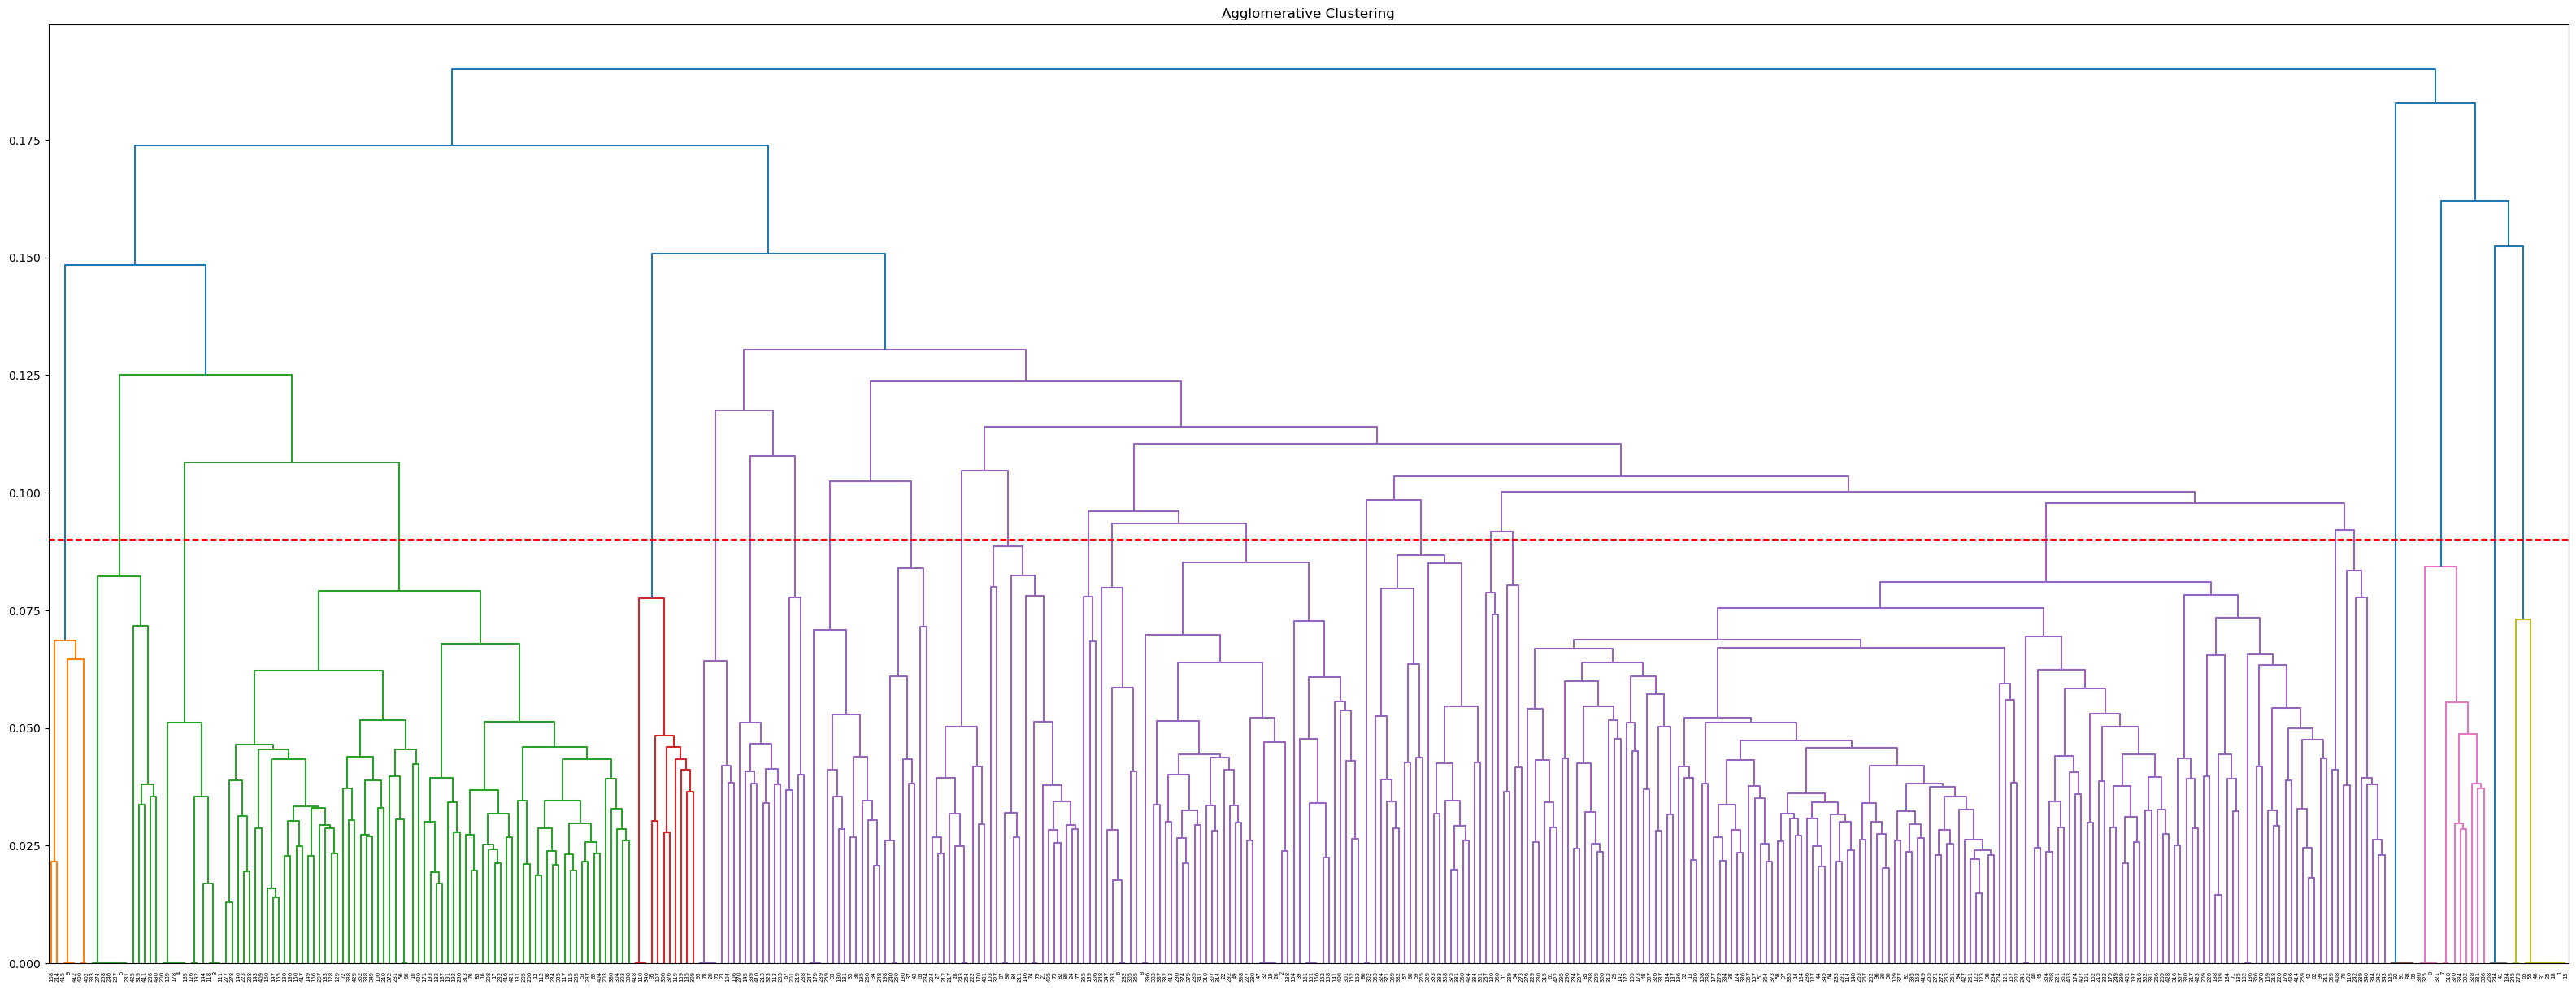

In [12]:
Z = linkage(x, method="ward")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='r')

plt.show()

In [13]:
agg = AgglomerativeClustering(n_clusters=26,linkage="ward")
agg = agg.fit(x)
re=agg.labels_
re

array([ 4, 17,  2, 15, 15, 19,  5,  4,  2,  7,  6, 21,  6, 10, 10, 17,  6,
        6, 17,  2, 25,  0,  2, 25,  0, 17,  2, 16, 16, 10, 10, 17,  2, 18,
       18, 18, 18,  3, 10,  2, 10, 23, 10,  3, 10, 10, 17,  2, 10,  2, 10,
       10, 10,  6, 21, 17,  6,  1, 10,  1,  1, 10, 10,  3, 10, 17,  6,  8,
        6,  6,  9, 10,  6, 25,  0,  0,  6,  0, 25,  0,  0, 10,  0,  6,  0,
       10, 20,  0, 13, 13,  0, 13, 13, 25, 10, 11, 10, 10, 10, 10,  6, 10,
       10,  0, 25, 10, 25, 11, 10, 10, 11, 15,  6, 14, 10,  6,  9,  6, 15,
       11, 12, 10, 10, 10, 10, 13, 15, 10,  6,  6,  6,  6, 15,  6, 10, 11,
        6, 10,  2, 22,  6,  2, 10,  6, 15, 14,  0,  6, 10,  6,  6,  2,  2,
       10,  2,  6,  2, 10,  2, 11,  6,  2,  2,  2, 10, 15,  6, 10,  7, 10,
       16,  6, 10, 10, 10, 10, 10, 10, 15, 18, 18, 18, 10,  6, 10, 10, 10,
        6, 10, 15,  3,  6,  6,  6, 23, 18, 10, 10,  3, 10, 15,  8, 10,  6,
       10,  6,  6,  6,  6, 10,  6,  0, 16, 14,  7, 10, 10, 16, 10,  8, 10,
       10, 16,  6, 16,  1

In [14]:
y['re'] = re

C:\Users\82105\AppData\Local\Temp\ipykernel_7484\1159153884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['re'] = re


In [15]:
y

,Document,re
0,Structures (구조),4
1,❖ 운영체제 서비스 (Operating System Services),17
2,❖ 운영체제 사용자 인터페이스 (User Operating System Interf...,2
3,❖ 시스템 콜 (System Calls),15
4,❖ 시스템 콜 유형 (Types of System Calls),15
...,...,...
427,부트블록(boot block)이 메모리에 로드되고 이것이 디스크에서,10
428,부트스트랩 로더를 메모리에 적재한다,10
429,❖ GRUB(GRand Unified Bootloader) : Linux 시스템을 ...,6
430,부트스트랩 프로그램,19


In [16]:
y.to_csv("re.csv", mode='w')

In [17]:
y[y['re']==0]

,Document,re
21, 명령어 라인 인터페이스 (Command Line Interface),0
24,– 명령어 또는 명령어 집합을 파일로 제공,0
74,❖ 명령어 해석기 (Command interpreter),0
75,"l CLI, 또는 명령어 해석기를 통해 명령어 직접 입력",0
77,"l 선택 가능한 여러 개의 명령어 해석기 (shells) 제공 – UNIX, Linux",0
79,❖ 명령어 해석기 (Command interpreter),0
80,l 역할 : 사용자의 명령어를 가져와 그것을 실행한다.,0
82,– 명령어 개수가 프로그램 크기를 결정,0
84,– 명령 해석기 프로그램 크기가 작아짐,0
87,명령해석기,0


In [18]:
y[y['re']==1]

,Document,re
57,l 자원 할당(resource allocation),1
59,할당해야 함,1
60,"– 자원 종류 - CPU cycles, main memory, file storag...",1
225,적재함,1
324,l 모듈로 제대로 분할되지 않음,1
329,❖ 최초의 UNIX,1
334, 커널(kernel),1
350,❖ 커널이 커져 관리가 어려워져 가능한 많은 기능을 커널에서 사용자 공간으로,1
351,옮겨 커널을 최소화,1
353,l Mac OS X 커널(Darwin)은 부분적으로 Mach에 기초함,1


In [19]:
y[y['re']==2]

,Document,re
2,❖ 운영체제 사용자 인터페이스 (User Operating System Interf...,2
8,❖ 운영체제 디버깅 (Operating System Debugging),2
19,❖ 사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스,2
22,– 문자열 명령 입력,2
26,❖ 사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스,2
32,❖ 사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스,2
39,메시지 전달,2
47,❖ 사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스,2
49, 운영체제는 가능한 모든 오류를 인지하고 있어야 함,2
138,l 운영체제 인터페이스의 자세한,2


In [20]:
y[y['re']==3]

,Document,re
37, 파일 정보 보기,3
43,정보 교환,3
63,l 회계(accounting),3
190,❖ 정보 관리(Information maintenance),3
198,l 상태 정보 전달,3
240,l 상태 정보,3
250,❖ 상태 정보 (Status Information),3
284,존재한다,3


In [21]:
y[y['re']==10]

,Document,re
13,❖ 운영체제를 구성하는 다양한 방법에 대해 논의,10
14,"❖ 운영체제 설치, 맞춤화 과정(customization), 부팅하는 방법",10
29,l 입출력 연산 (I/O),10
30, 프로그램 실행에서 요구하는 파일 또는 입출력 장치 등의 입출력 서비스,10
38, 파일 접근 권한 관리,10
...,...,...
422,l 펌웨어(firmware) ROM(Read Only Memory)이 초기 부팅 코...,10
423,❖ 운영체제를 하드웨어가 시작할 수 있도록 하드웨어에게 알려야 한다,10
426,l 두 단계로 나눠지는 경우도 있음- ROM의 특정한 위치에 있는,10
427,부트블록(boot block)이 메모리에 로드되고 이것이 디스크에서,10


In [22]:
y[y['re']==15]

,Document,re
3,❖ 시스템 콜 (System Calls),15
4,❖ 시스템 콜 유형 (Types of System Calls),15
111,시스템 콜 (System Calls),15
118,시스템 콜 (System Calls),15
126,시스템 콜 구현 (System Call Implementation) 1,15
132,시스템 콜 구현 (System Call Implementation) 2,15
144,콜을 연결해 주는 시스템 콜,15
165,시스템 콜 유형 1,15
178,시스템 콜 유형 2,15
189,시스템 콜 유형 3,15


In [23]:
y[y['re']==20]

,Document,re
86,– 예 : rm file.txt (p65),20
302,❖ 예,20


In [24]:
y[y['re']==26]

,Document,re


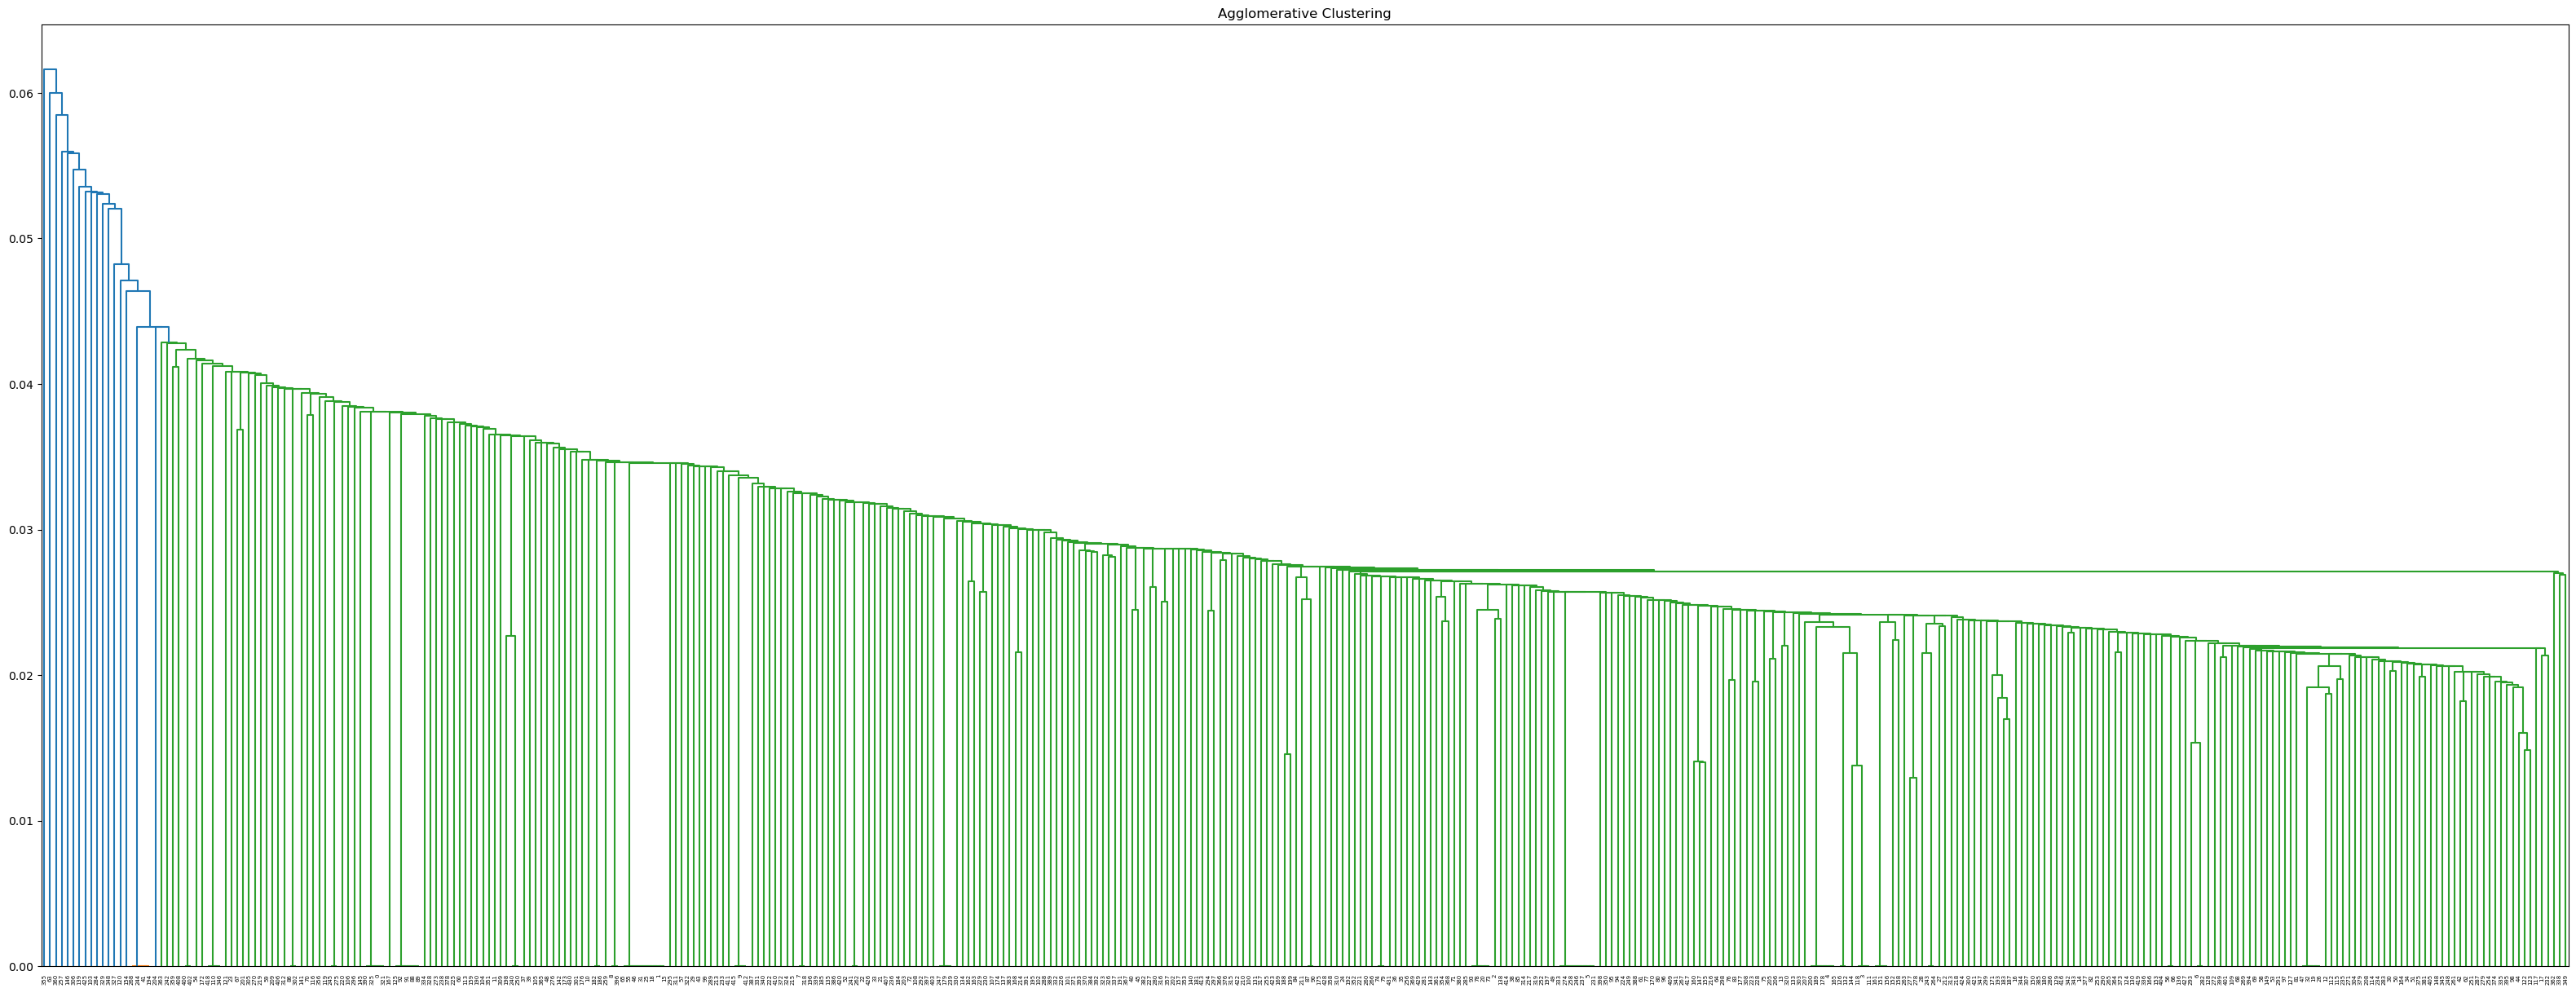

In [25]:
Z = linkage(x, method="single")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='k')

plt.show()

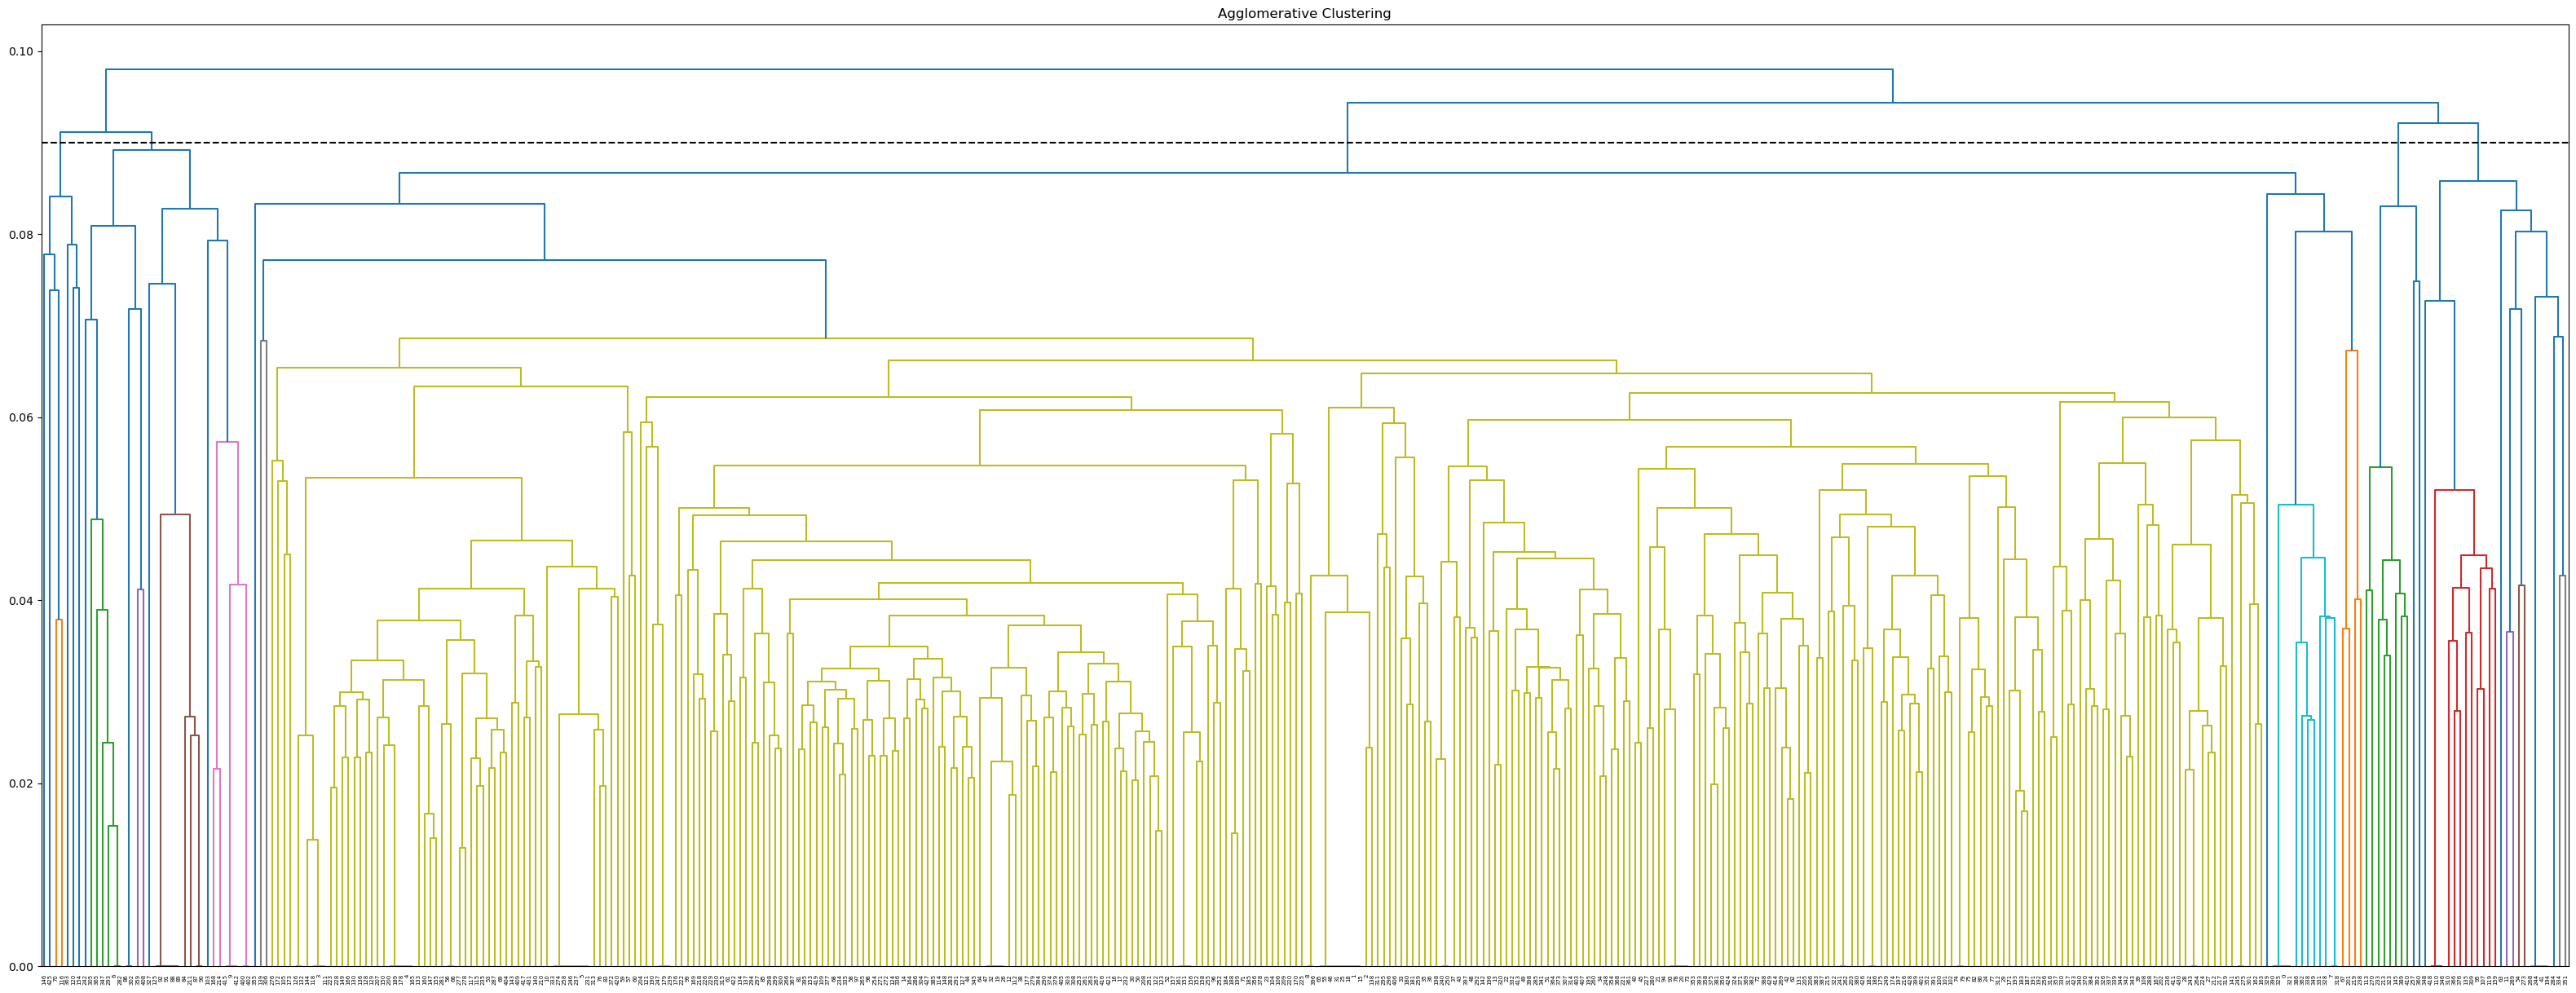

In [26]:
Z = linkage(x, method="complete")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='k')

plt.show()

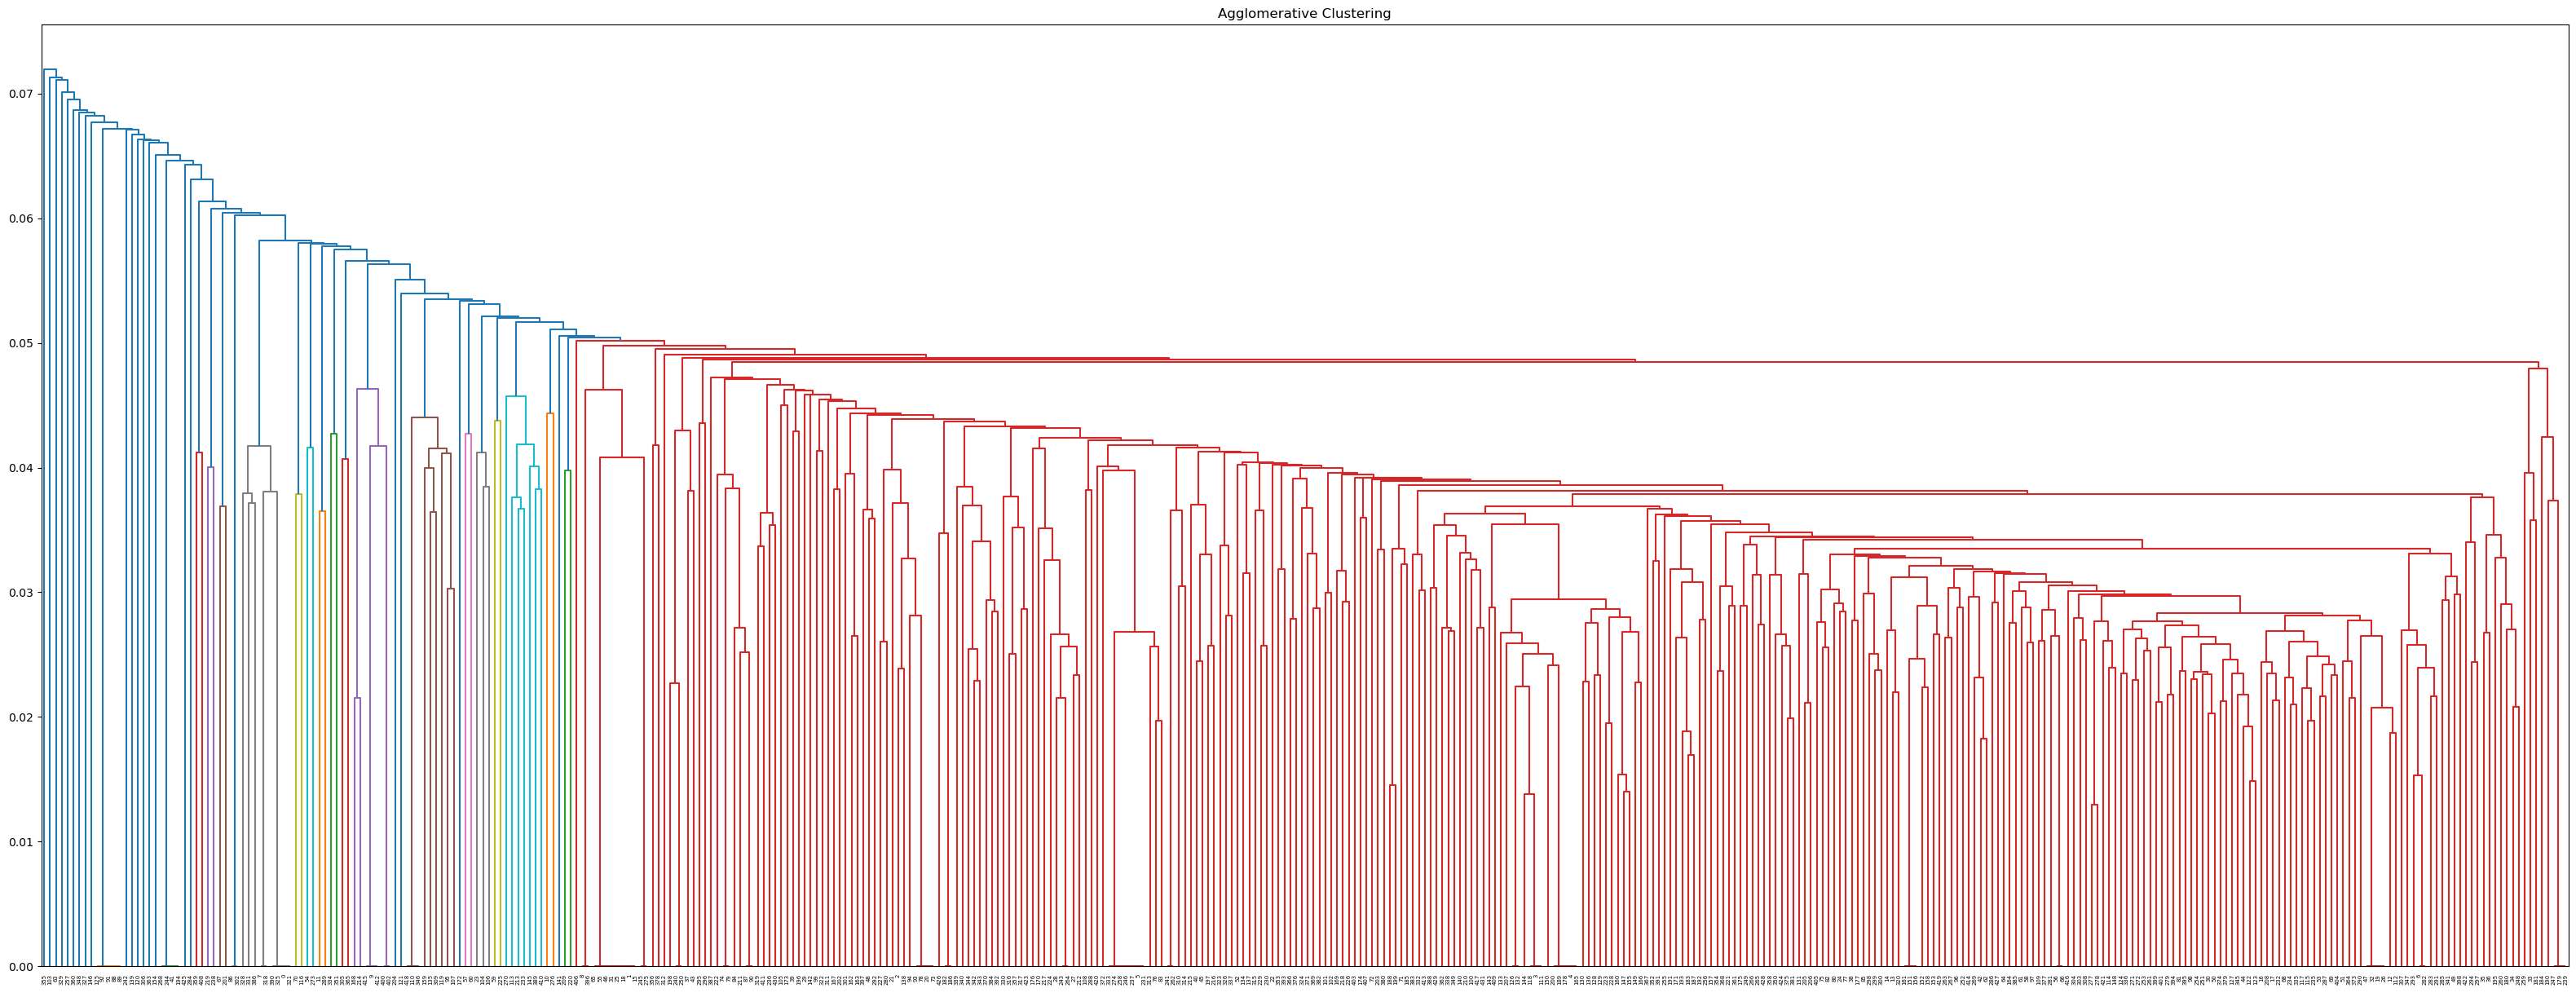

In [27]:
Z = linkage(x, method="average")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='k')

plt.show()

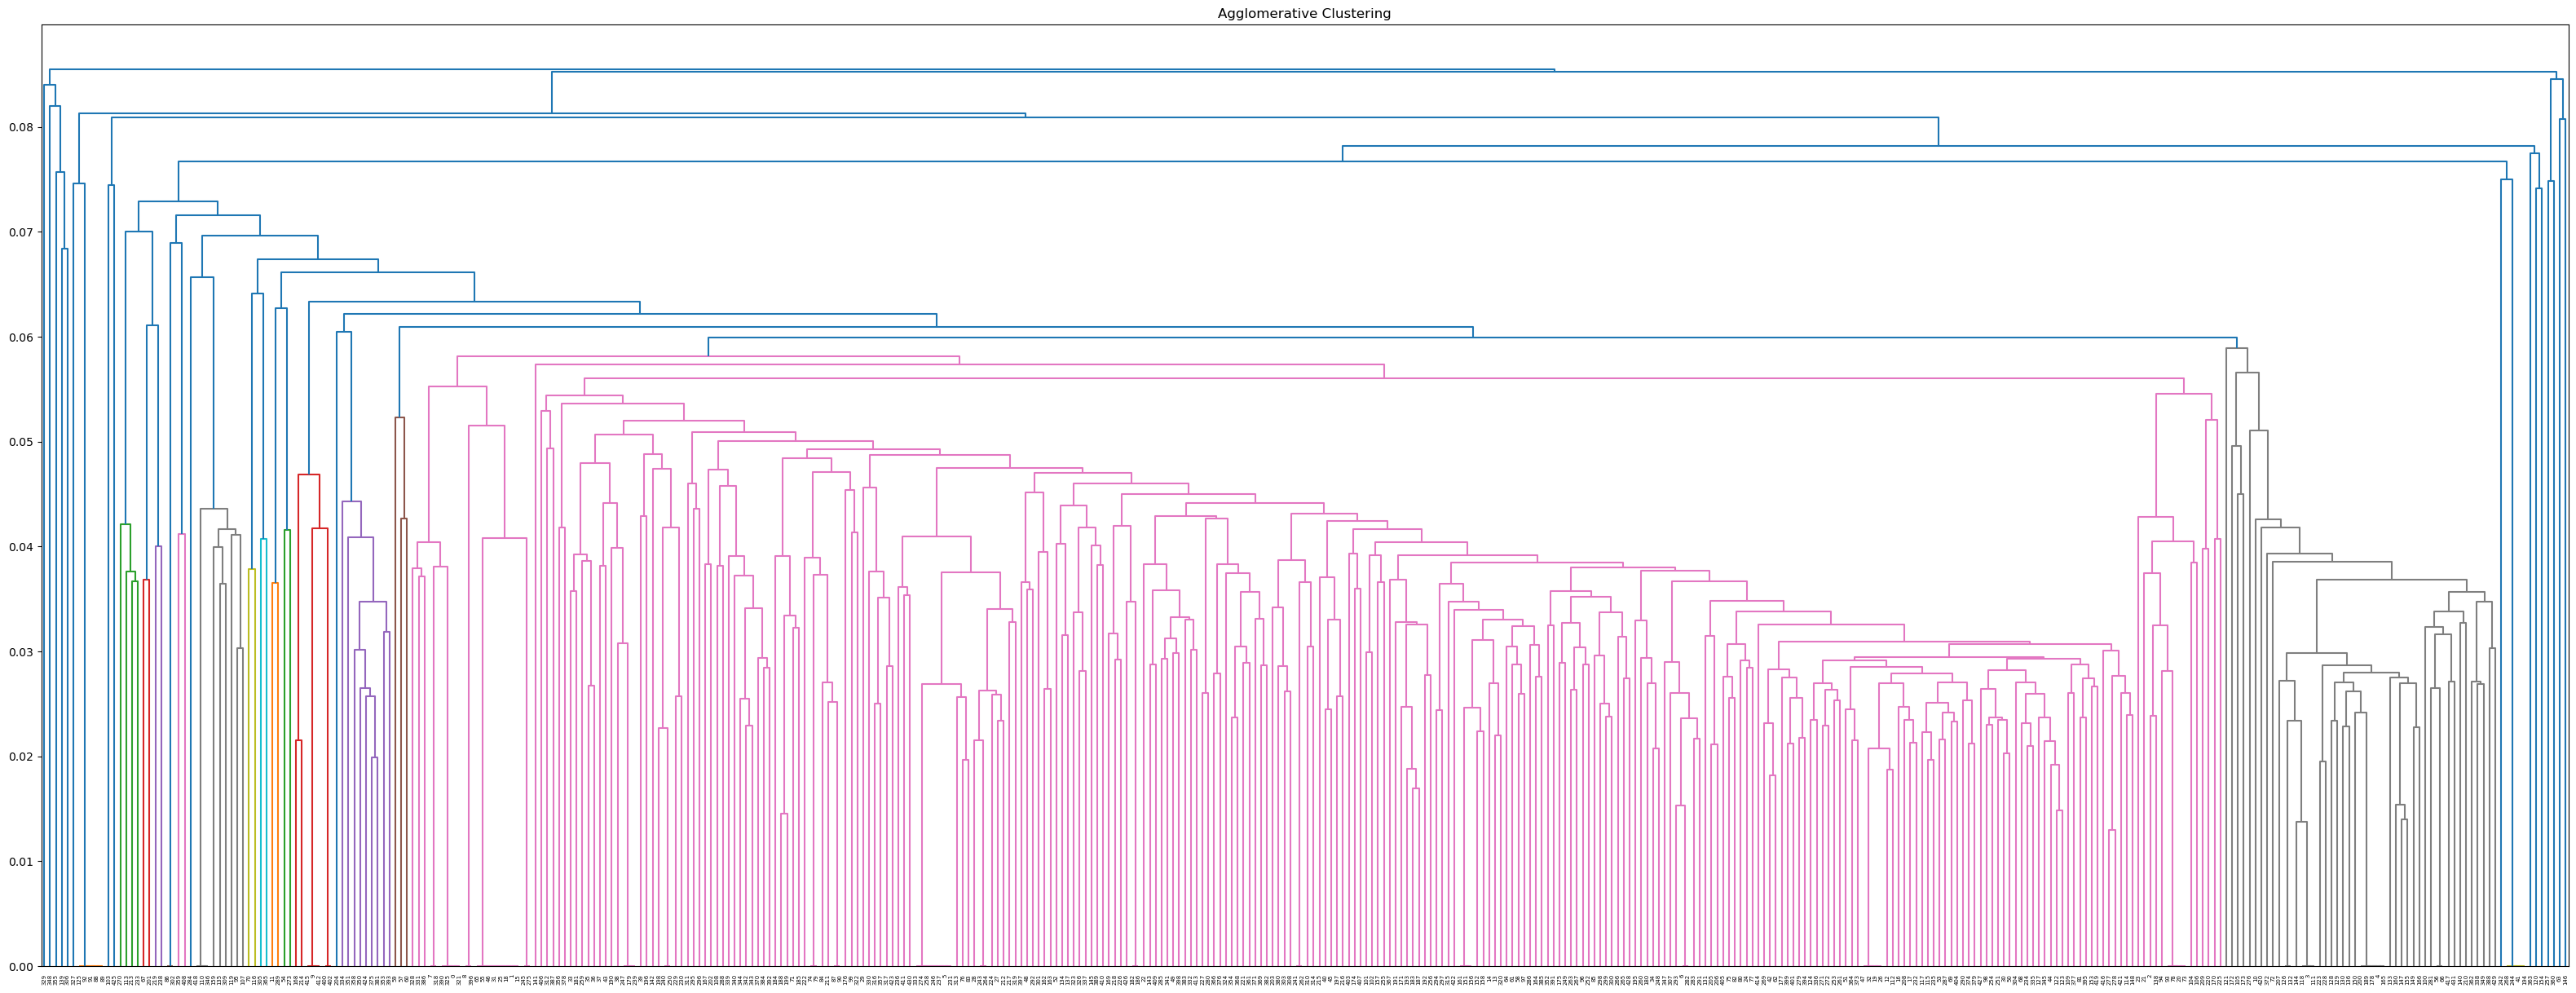

In [28]:
Z = linkage(x, method="weighted")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='k')

plt.show()

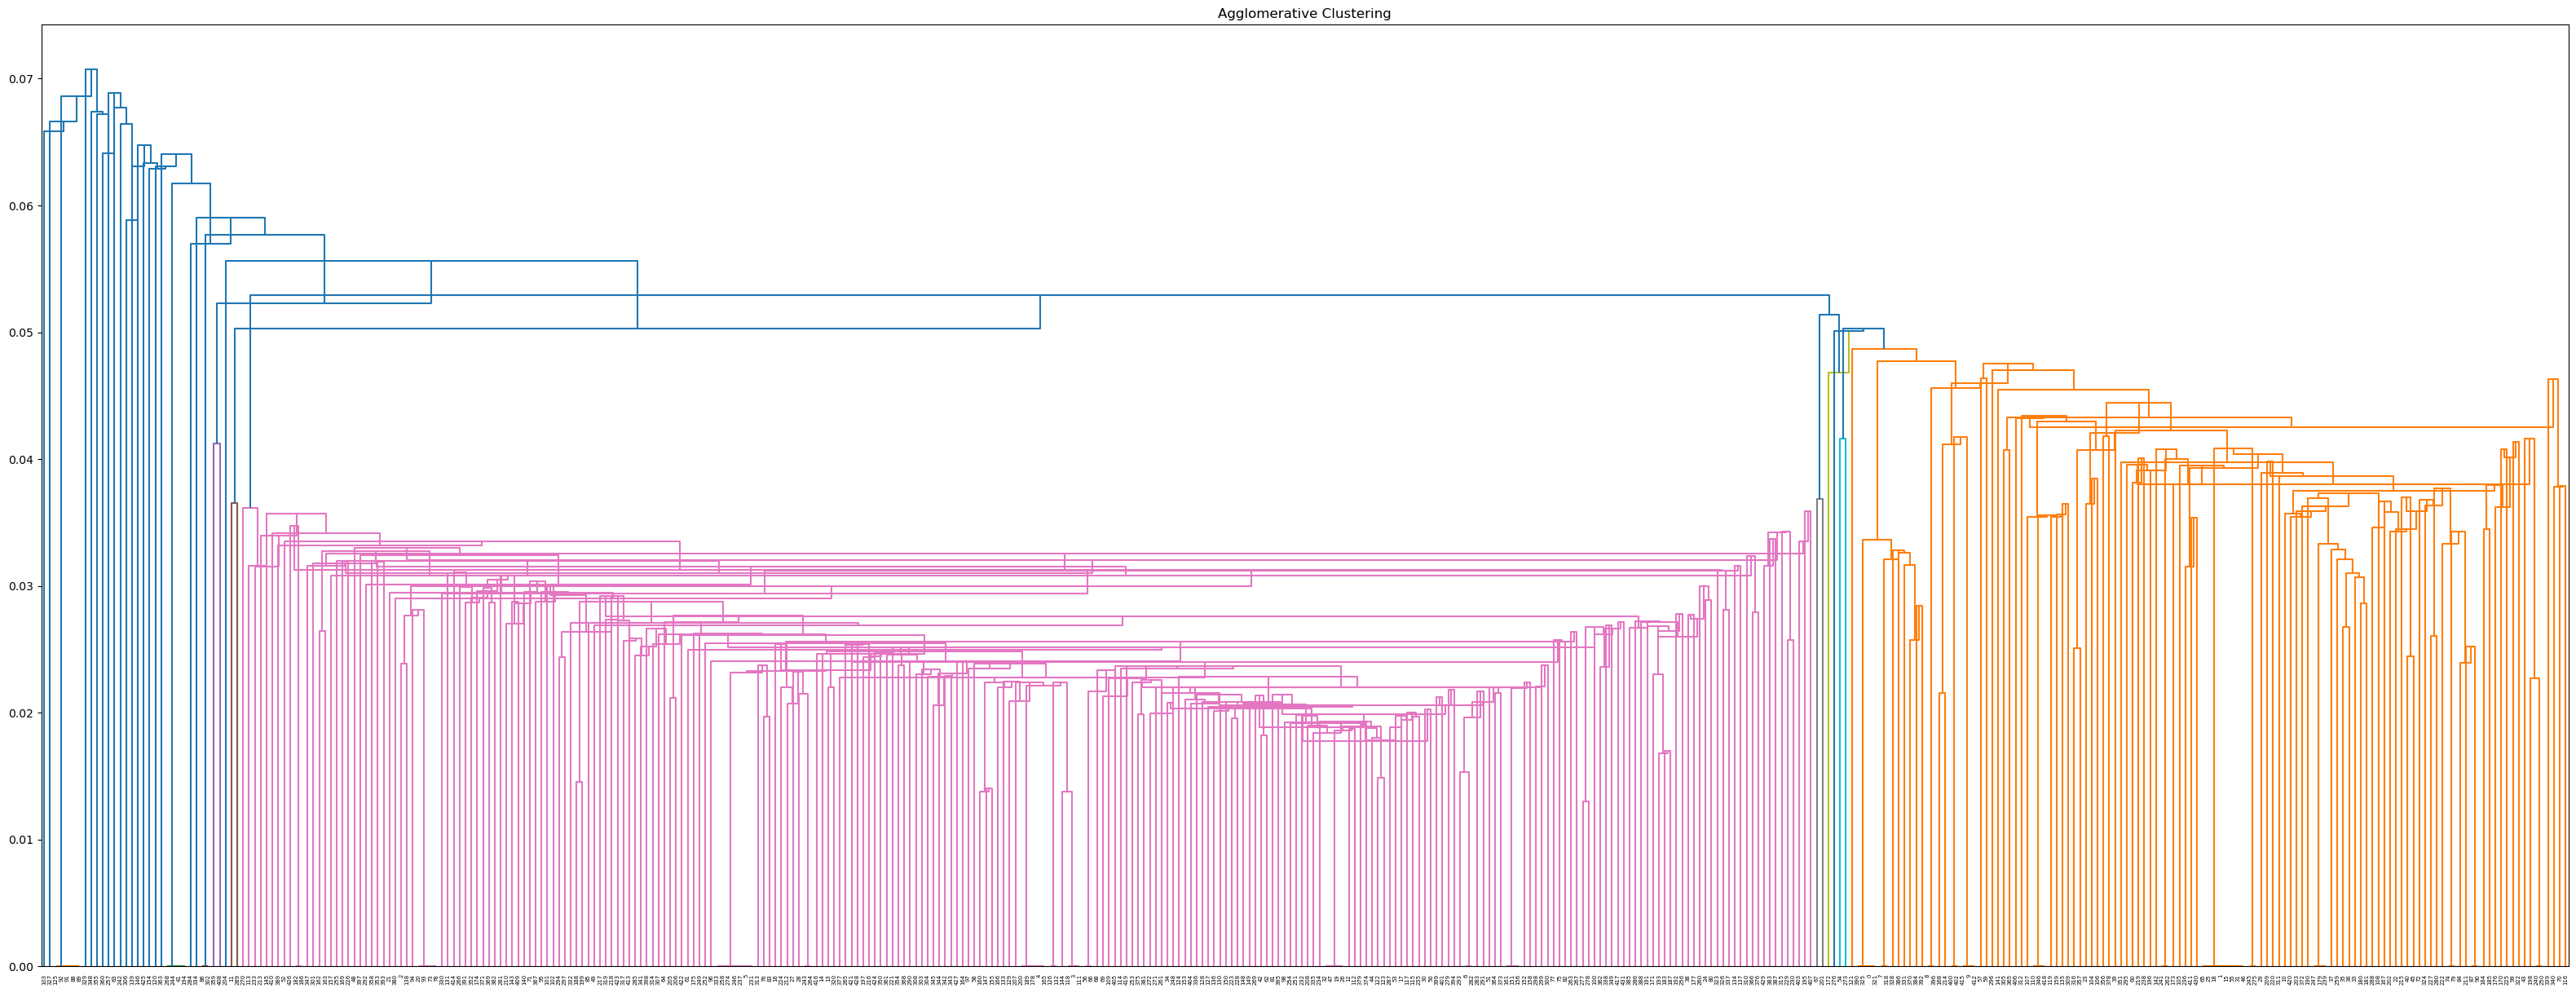

In [29]:
Z = linkage(x, method="median")
plt.figure(figsize=(40, 15))
dg = dendrogram(Z)
plt.title("Agglomerative Clustering")
ax = plt.gca()

bounds = ax.get_xbound()

ax.plot(bounds, [0.09, 0.09], '--', c='k')

plt.show()